In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import csv files
city_data = pd.read_csv('city_data.csv')
ride_data = pd.read_csv('ride_data.csv')

In [3]:
#display city data & ride data
print(city_data.head())
print(ride_data.head())

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


In [4]:
#merge data
merged_data = pd.merge(city_data, ride_data, on='city', how='outer')
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
#breakout by type
#rural
raw_rural = merged_data.loc[merged_data['type'] == 'Rural']

#suburban
raw_suburban = merged_data.loc[merged_data['type'] == 'Suburban']

#urban
raw_urban = merged_data.loc[merged_data['type'] == 'Urban']

In [6]:
#avg fare per city rural
avg_fare_city_rural = raw_rural.groupby('city').mean()
avg_fare_city_rural = avg_fare_city_rural['fare']
avg_fare_city_rural.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [7]:
#avg fare per city suburban
avg_fare_city_suburban = raw_suburban.groupby('city').mean()
avg_fare_city_suburban = avg_fare_city_suburban['fare']
avg_fare_city_suburban.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [8]:
#avg fare per city urban
avg_fare_city_urban = raw_urban.groupby('city').mean()
avg_fare_city_urban = avg_fare_city_urban['fare']
avg_fare_city_urban.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [9]:
#total rides per city rural
rides_city_rural = raw_rural.groupby('city').count()
rides_city_rural = rides_city_rural['ride_id']
rides_city_rural.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [10]:
#total rides per city suburban
rides_city_suburban = raw_suburban.groupby('city').count()
rides_city_suburban = rides_city_suburban['ride_id']
rides_city_suburban.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [11]:
#total rides per city urban
rides_city_urban = raw_urban.groupby('city').count()
rides_city_urban = rides_city_urban['ride_id']
rides_city_urban.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [12]:
#breakout by type drivers
#rural
raw_drivers_rural = city_data.loc[city_data['type'] == 'Rural']

#suburban
raw_drivers_suburban = city_data.loc[city_data['type'] == 'Suburban']

#urban
raw_drivers_urban = city_data.loc[city_data['type'] == 'Urban']

In [13]:
#get driver count for each city within type
#rural
drivers_rural = raw_drivers_rural.set_index('city')
drivers_rural = drivers_rural['driver_count']

#suburban
drivers_suburban = raw_drivers_suburban.set_index('city')
drivers_suburban = drivers_suburban['driver_count']

#urban
drivers_urban = raw_drivers_urban.set_index('city')
drivers_urban = drivers_urban['driver_count']


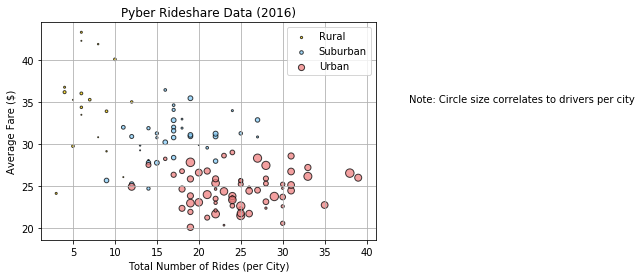

In [29]:
#bubble plot
#rural
plt.scatter(rides_city_rural, avg_fare_city_rural, marker="o", facecolors="gold", edgecolors="black",
            s=drivers_rural, label='Rural', alpha=0.75)

#suburban
plt.scatter(rides_city_suburban, avg_fare_city_suburban, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=drivers_suburban,label='Suburban', alpha=0.75)

#urban
plt.scatter(rides_city_urban, avg_fare_city_urban, marker="o", facecolors="lightcoral", edgecolors="black",
            s=drivers_urban, label='Urban', alpha=0.75)

plt.title('Pyber Rideshare Data (2016)')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')

plt.legend()
plt.text(45, 35, 'Note: Circle size correlates to drivers per city')
plt.grid()

In [18]:
#total type rides
rides_type = merged_data.groupby('type').count()
rides_type = rides_type['ride_id']
rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [20]:
#total fare type rides
total_fare_type = merged_data.groupby('type').sum()
total_fare_type = total_fare_type['fare']
total_fare_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [21]:
#total type drivers
drivers_type = city_data.groupby('type').sum()
drivers_type

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [32]:
#driver type pie chart data
driver_labels = ['Rural', 'Suburban', 'Urban']
driver_colors = ['gold', 'lightskyblue', 'lightcoral']
driver_explode = (0, 0, 0.1)

Text(0.5,1,'% of Total Drivers by City Type')

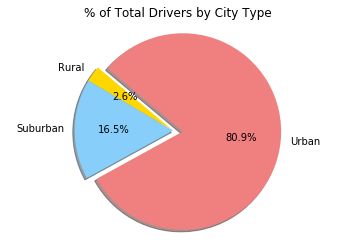

In [33]:
#driver type pie chart
plt.pie(drivers_type, explode=driver_explode, labels=driver_labels, colors=driver_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('% of Total Drivers by City Type')

In [24]:
#ride type pie chart data
ride_labels = ['Rural', 'Suburban', 'Urban']
ride_colors = ['gold', 'lightskyblue', 'lightcoral']
ride_explode = (0, 0, 0.1)

Text(0.5,1,'% of Total Rides by City Type')

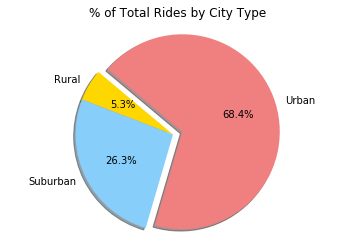

In [25]:
#ride type pie chart
plt.pie(rides_type, explode=ride_explode, labels=ride_labels, colors=ride_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('% of Total Rides by City Type')

In [26]:
#fare type pie chart data
fare_labels = ['Rural', 'Suburban', 'Urban']
fare_colors = ['gold', 'lightskyblue', 'lightcoral']
fare_explode = (0, 0, 0.1)

Text(0.5,1,'% of Total Fares by City Type')

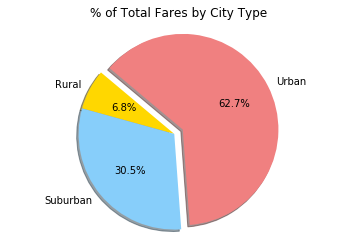

In [27]:
#ride type pie chart
plt.pie(total_fare_type, explode=fare_explode, labels=fare_labels, colors=fare_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('% of Total Fares by City Type')